## Portfolio 3: Titanic Survivability Analysis

In [805]:
from IPython.display import Image, display, HTML
display(HTML(f"<div style='text-align: center;'><img src='https://i.pinimg.com/564x/14/c3/88/14c3887e3825b1259470861916f6e003.jpg' width='500'></div>"))

This portfolio task explores a dataset from [Kaggle](https://www.kaggle.com/c/titanic/data) related to the Titanic disaster. The dataset provides detailed information about passengers, including their demographics, ticket details, and survival status.

#### Dataset Fields:
* `PassengerId`- passenger's identification number 
* `Survived`- survival status (0 = No, 1 = Yes)
* `Pclass`- ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* `Name` - passenger's name
* `Sex` - passenger's gender
* `Age` - passenger's age (in years)
* `SibSp` - number of siblings or spouses on board
* `Parch` - number of parents or children on board
* `Ticket` - ticket number
* `Fare` - amount paid for the ticket
* `Cabin` - cabin number
* `Embarked` - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

The main objective of this portfolio is to predict the likelihood of passenger survival using machine learning models and to identify the algorithm that provides the highest predictive accuracy. The target variable is **Survived**, while the remaining fields serve as the predictors. There are several steps involved in this process: 

1) **Data Exploration** - Analyse data structure and identify correlations among variables.

2) **Data Preparation** - Address missing values, remove irrelevant columns, and transform categorical data into numerical formats for analysis.

3) **Data Modelling** - Train predictive models such as Logistic Regression and K-Nearest Neighbors (KNN) to determine survival probabilities.

4) **Evaluation** - Assess model performance using accuracy metrics and select the best-performing algorithm.

In [806]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [807]:
# Read the csv file
df = pd.read_csv('files/Titanic_train.csv')

---
### Data Exploration 

In [808]:
# Display the first 10 records of the dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [809]:
# Dataset dimensions
print(f"Dataset dimensions (rows, columns): {df.shape}")  

Dataset dimensions (rows, columns): (891, 12)


In [810]:
# Data types of variables
print("Data Types:")
print(df.info()) 

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [811]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [812]:
# Separate numerical and categorical variables
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = df[['Survived', 'Pclass', 'Sex', 'Embarked']]

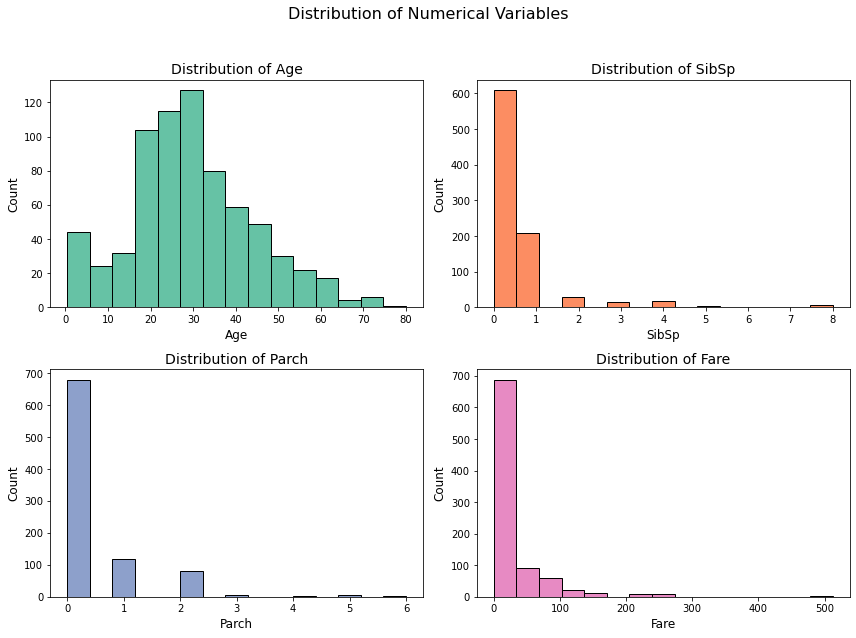

In [813]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Distribution of Numerical Variables", fontsize=16)

# Define colors for each variable
colors = sns.color_palette("Set2", len(df_num.columns))

# Loop through each numerical column and plot
for i, col in enumerate(df_num.columns):
    row, col_index = divmod(i, 2)  # Determine row and column in the grid
    axes[row, col_index].hist(df_num[col], color=colors[i], edgecolor='black', bins=15)
    axes[row, col_index].set_title(f"Distribution of {col}", fontsize=14)
    axes[row, col_index].set_xlabel(col, fontsize=12)
    axes[row, col_index].set_ylabel("Count", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

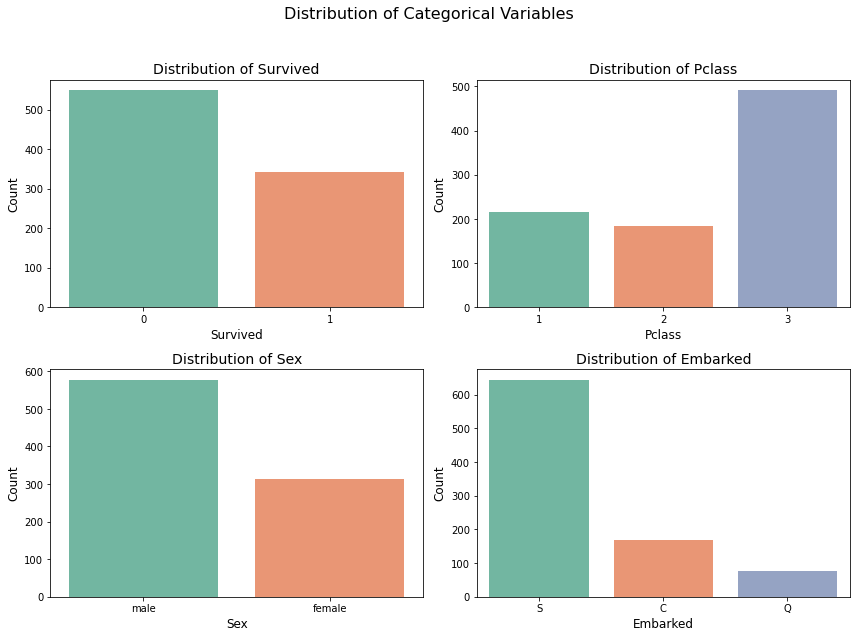

In [814]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 9))
fig.suptitle("Distribution of Categorical Variables", fontsize=16)

# Loop through each categorical column and plot
for i, col in enumerate(df_cat.columns):
    row, col_index = divmod(i, 2)  # Determine row and column in the grid
    sns.countplot(data=df, x=col, palette="Set2", ax=axes[row, col_index])
    axes[row, col_index].set_title(f"Distribution of {col}", fontsize=14)
    axes[row, col_index].set_xlabel(col, fontsize=12)
    axes[row, col_index].set_ylabel("Count", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**Key Findings:**
1. Only 38% of passengers survived, indicating a high mortality rate of 62%.
2. Most passengers traveled in 3rd class, likely the most affordable option.
3. The average passenger age was approximately 30 years, ranging from infants to 80 years old.
4. A significant portion of the age data is missing (20%), requiring careful handling.
5. Most passengers traveled alone, with no siblings, spouses, parents, or children on board.
7. Male tourists constituted 65% of the passengers, while female tourists constituted 35%.

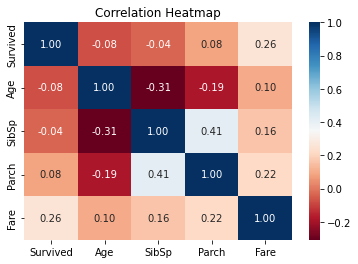

In [815]:
# Correlation Heatmap
sns.heatmap(
    df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']].corr(),
    annot=True, fmt='.2f', cmap='RdBu'
)
plt.title("Correlation Heatmap")
plt.show()

**Observation**

The correlations between the variables and survival are relatively weak. 
- Age: Older passengers were marginally less likely to survive, but the relationship is not strong.
- Siblings/Spouse: A very weak negative correlation implies that having siblings or a spouse onboard had almost no effect on survival likelihood.
- Parents/Children: Having parents or children onboard had a slight, but negligible, positive influence on survival.
- Fare: Passengers who paid higher fares were somewhat more likely to survive, likely due to better access to lifeboats or preferential treatment.

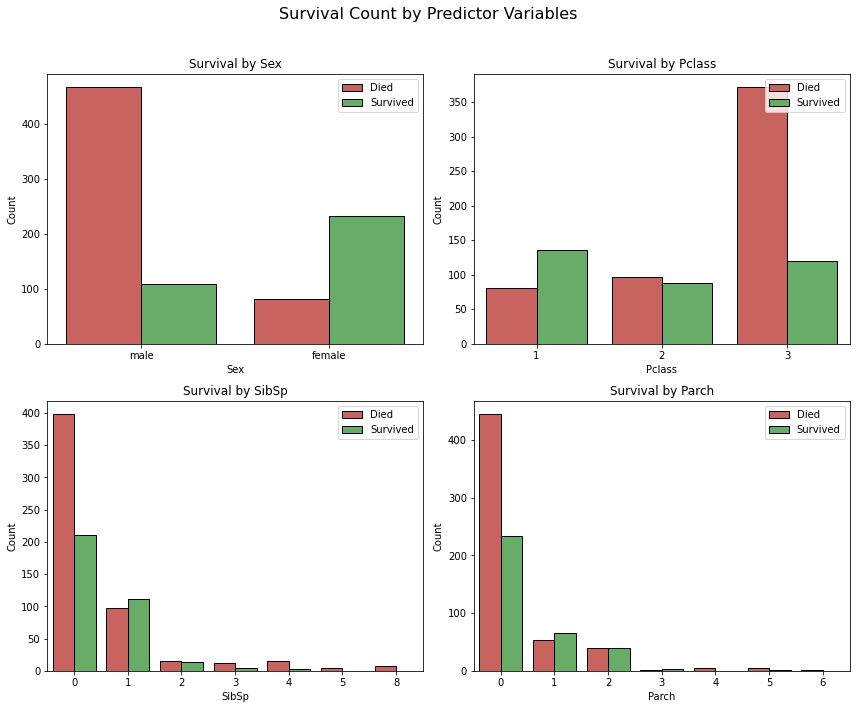

In [816]:
# Create the figure and axes objects first
n_rows, n_cols = 2, 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 10))
features = ['Sex','Pclass','SibSp','Parch']

# Set the title for the entire figure
fig.suptitle("Survival Count by Predictor Variables", fontsize=16)

# Plotting the survival count for each feature
for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < len(features):
            ax = axs[r, c]
            sns.countplot(data=df, x=features[i], hue='Survived', ax=ax, palette={0: '#D9534F', 1: '#5CB85C'}, edgecolor='black')
            ax.set_title(f'Survival by {features[i]}')
            ax.legend(labels=['Died', 'Survived'], loc='upper right')
            ax.set_xlabel(features[i])
            ax.set_ylabel('Count')

# Adjust the layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

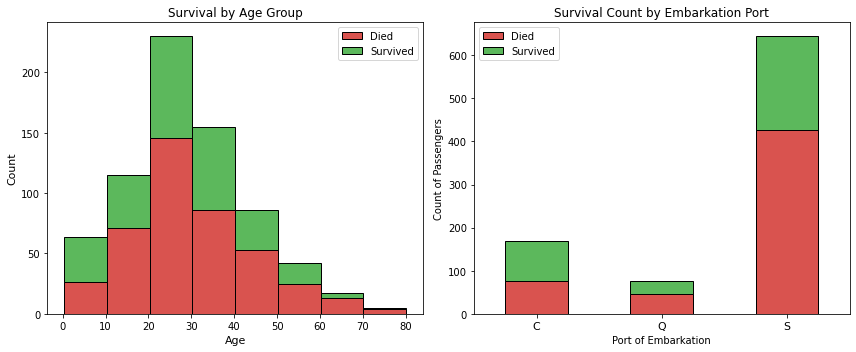

In [817]:
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Survival by Age Distribution
df1 = df[df['Survived'] == 0]['Age']
df2 = df[df['Survived'] == 1]['Age']

axs[0].hist([df1, df2], bins=8, stacked=True, label=['Died', 'Survived'], color=['#D9534F', '#5CB85C'], edgecolor='black')
axs[0].legend()
axs[0].set_title("Survival by Age Group")
axs[0].set_xlabel("Age", fontsize=11)
axs[0].set_ylabel("Count", fontsize=11)

# Survival count by Embarked with improved visuals
embarked_port = df.groupby('Embarked')['Survived'].value_counts().unstack()

embarked_port.plot(kind='bar', stacked=True, color=['#D9534F', '#5CB85C'], edgecolor='black', ax=axs[1])

# Customize the second plot's legend and labels
axs[1].legend(['Died', 'Survived'])
axs[1].set_title('Survival Count by Embarkation Port')
axs[1].set_xlabel('Port of Embarkation')
axs[1].set_ylabel('Count of Passengers')

# Adjust x-axis tick labels and ensure readability
plt.xticks(rotation=0, fontsize=11)

# Tight layout for better spacing between the subplots
plt.tight_layout()

# Show the plots
plt.show()


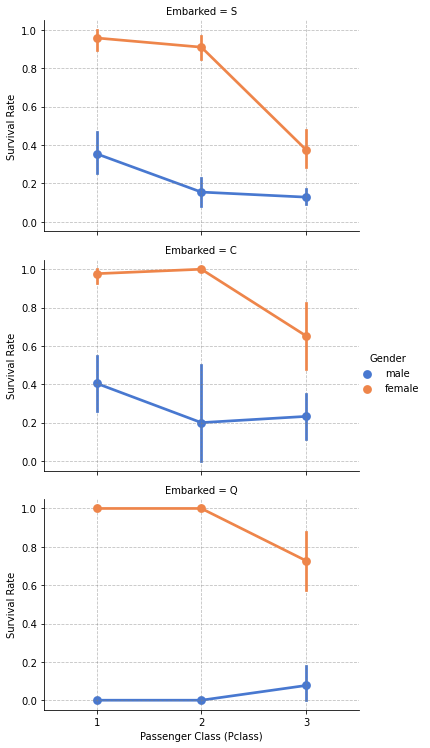

In [818]:
FacetGrid = sns.FacetGrid(df, row='Embarked', height=3.5, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='muted', hue_order=['male', 'female'])
FacetGrid.add_legend(title='Gender', loc='center', bbox_to_anchor=(1.05, 0.5))
FacetGrid.set_axis_labels('Passenger Class (Pclass)', 'Survival Rate')

# Display grid lines
FacetGrid.map(plt.grid, linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

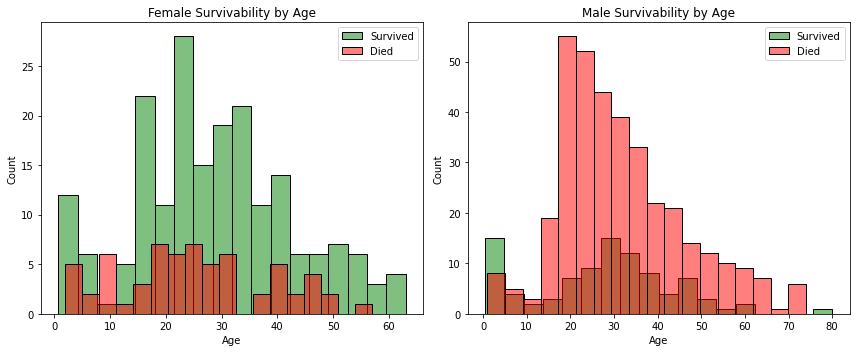

In [819]:
# Survival by Gender and Age
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

# Female Survivability by Age
sns.histplot(women[women['Survived'] == 1]['Age'], bins=18, ax=axes[0], kde=False, color='green', label='Survived', alpha=0.5)
sns.histplot(women[women['Survived'] == 0]['Age'], bins=18, ax=axes[0], kde=False, color='red', label='Died', alpha=0.5)
axes[0].legend()
axes[0].set_title("Female Survivability by Age")

# Male Survivability by Age
sns.histplot(men[men['Survived'] == 1]['Age'], bins=18, ax=axes[1], kde=False, color='green', label='Survived', alpha=0.5)
sns.histplot(men[men['Survived'] == 0]['Age'], bins=18, ax=axes[1], kde=False, color='red', label='Died', alpha=0.5)
axes[1].legend()
axes[1].set_title("Male Survivability by Age")

plt.tight_layout()
plt.show()

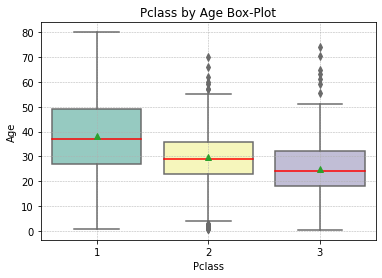

In [820]:
# Pclass by Age Box-Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Age', data=df, palette="Set3", showmeans=True, medianprops={'color': 'red'})
plt.grid(True, linestyle='--', linewidth=0.5)
plt.title("Pclass by Age Box-Plot")
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.show()

**Observation**

**1. Socio-Economic Disparity in Survival:**
Passengers in 3rd Class faced the highest mortality rates, significantly higher than those in 1st or 2nd Class, reflecting a stark socio-economic disparity in access to safety during the disaster. Additionally, wealthier travelers in higher classes tended to belong to older age groups, further highlighting economic privilege.

**2. Impact of Family and Travel Companions:**
Passengers who traveled alone had a significantly lower chance of survival. However, those with 1 or 2 parents/children saw higher survival rates, while passengers with more than two siblings or spouses experienced a drastic reduction in survivability.

**3. Age and Gender Influence on Mortality:**
Mortality was disproportionately high among passengers aged 20–40, a demographic likely dominated by adult males. Female passengers exhibited a far higher survival rate compared to males, suggesting gender prioritization during rescue operations.

**4. Port of Embarkation:**
Passengers boarding from Cherbourg demonstrated a higher survival rate compared to those from Southampton or Queenstown.

---
### Data Preparation

In [821]:
# Check for Missing Values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [822]:
# Fill missing values in 'Embarked' with the most common value
common_value = df['Embarked'].mode()[0] 
df['Embarked'] = df['Embarked'].fillna(common_value)

# Impute missing values in 'Age' using random sampling within mean ± std deviation
mean_age = df["Age"].mean()
std_age = df["Age"].std()
rand_ages = np.random.randint(mean_age - std_age, mean_age + std_age, size=df["Age"].isnull().sum())
df.loc[df["Age"].isnull(), "Age"] = rand_ages

# Verify no missing values remain
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


Given the sparsity in the *Cabin* attribute, meaningful imputation is challenging. Therefore, this feature will be excluded from the dataset to avoid introducing noise and ensure model efficiency.

In [823]:
# Drop irrelevant features
df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1,inplace=True)

In [824]:
# Encode categorical columns
for col in ['Sex', 'Embarked']:
    df[col] = LabelEncoder().fit_transform(df[col])

- **Sex**: 0 = Female; 1 = Male
- **Embarked**: 0 = Cherbourg; 1 = Queenstown; 2 = Southampton

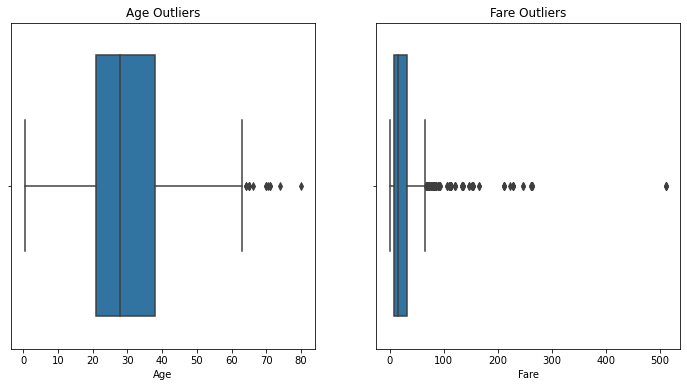

In [825]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))

# Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')

# Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')

plt.show()

In [826]:
# Apply log transformation to Fare to handle skewness (ensure positive values by using log1p)
df['Fare'] = np.log1p(df['Fare'])

# Standardize age and fare to ensure consistent scale
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

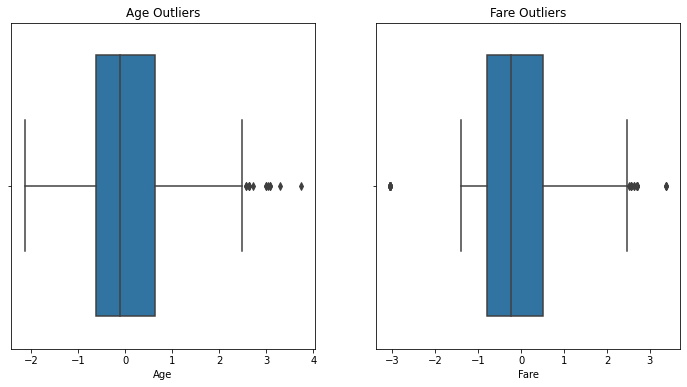

In [827]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 6))

# Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Age Outliers')

# Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title('Fare Outliers')

plt.show()

---
### Data Modelling

This portfolio focuses on predicting passenger survival chances using supervised machine learning models. Given the availability of labeled data, unsupervised learning is not applicable. Specifically, logistic regression and K-nearest neighbors will be employed to predict survivability, and their accuracy will be evaluated to identify the most suitable algorithm for this scenario.

### <u> Logistic Regression Model </u>

In [828]:
# Feature Selection
X = df.drop('Survived', axis=1)  # Selecting predictors
y = df['Survived']  # Selecting response variable

# Split the data into training (80%) and testing (20%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Create RFE object
lr_model = LogisticRegression(max_iter=1000, random_state=101)
rfe = RFE(estimator=lr_model, n_features_to_select=6, step=1)
rfe.fit(X_train, y_train)

# Evaluation
y_test_hat = rfe.predict(X_test)
print(f"Accuracy score on test set with RFE: {accuracy_score(y_test, y_test_hat)}")

Accuracy score on test set with RFE: 0.7932960893854749


Accuracy on test set using 1 features: 0.7932960893854749
Accuracy on test set using 2 features: 0.7932960893854749
Accuracy on test set using 3 features: 0.776536312849162
Accuracy on test set using 4 features: 0.7821229050279329
Accuracy on test set using 5 features: 0.7877094972067039
Accuracy on test set using 6 features: 0.7932960893854749
Accuracy on test set using 7 features: 0.7877094972067039
Accuracy on test set using 8 features: 0.7877094972067039
Number of features to select for best accuracy: 1


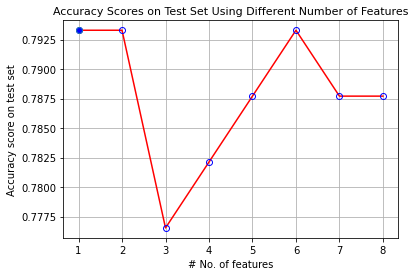

In [829]:
# Evaluate accuracy scores with different numbers of features
acc_scores = []
for i in range(1, 9):
    clf = LogisticRegression(max_iter=1000, random_state=101)
    rfe = RFE(estimator=clf, n_features_to_select=i)
    rfe.fit(X_train, y_train)
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set using {i} features: {acc_score}")
    acc_scores.append(acc_score)

# Visualizing accuracy scores using different numbers of features
plt.title("Accuracy Scores on Test Set Using Different Number of Features", size=11)
plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 9), acc_scores, marker='o', color='red', markeredgewidth=1, markeredgecolor='blue', markerfacecolor='None')

best = acc_scores.index(max(acc_scores)) + 1
plt.plot(best, acc_scores[best - 1], marker='o', markerfacecolor='blue')
print(f"Number of features to select for best accuracy: {best}")
plt.show()

**Observation**

The highest accuracy of 0.7932 was achieved with 1 predictors. However, adding more than one features led to a decline in test accuracy, suggesting that beyond a certain point, additional predictors may introduce noise or overfitting, rather than improving model performance.

### <U> K-Nearest Neighbors </u>

In [830]:
# Create and train a KNN classifier model with K=10
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

# Predict on the test set and evaluate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Testing accuracy with K=10: ', accuracy)

Testing accuracy with K=10:  0.7597765363128491


In [831]:
# Perform 10-fold cross-validation to estimate accuracy for K=10
clf = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(clf, X, y, cv=10)

# Output accuracy for each fold and the average with standard deviation
print('Accuracy for each fold: \n', scores)
print('Average accuracy: %.4f ± %.4f' % (scores.mean(), scores.std()))

Accuracy for each fold: 
 [0.81111111 0.82022472 0.74157303 0.82022472 0.83146067 0.83146067
 0.84269663 0.76404494 0.82022472 0.78651685]
Average accuracy: 0.8070 ± 0.0309


The model has an average accuracy of 79% with a standard deviation of 4%. This suggests that the accuracy of the model may fluctuate by ±4%.

**<u>Automated Hyperparameter Tuning for Model Optimization</u>**

In [832]:
# Hyperparameter tuning using GridSearchCV
parameter_grid = {'n_neighbors': range(1, 41)}
knn_clf = KNeighborsClassifier()

# Use GridSearchCV with 10-fold cross-validation to find the best 'k'
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X, y)

# Output the best k and corresponding accuracy score
print('Best K value: ', clf.best_params_['n_neighbors'])
print('Best accuracy score: ', clf.best_score_)

Best K value:  5
Best accuracy score:  0.809238451935081


In [833]:
# Get the best model from GridSearchCV
best_model = clf.best_estimator_

# Predict on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Calculate and display accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test set accuracy: ", test_accuracy)

Test set accuracy:  0.8938547486033519


---
### Creating Functions for Advanced Machine Learning Models

In [845]:
def train_models(X_train, y_train):
    # Define models
    models = {
        "Logistic Regression": LogisticRegression(random_state=4),
        "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
        "Gaussian Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=4),
        "Random Forest": RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=4),
    }
    
    # Train models and store results
    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model
        print(f"{name} Training Accuracy: {model.score(X_train, y_train):.4f}")
    
    return trained_models

In [846]:
# Get the training accuracy scores for each model
models = train_models(X_train, y_train)

Logistic Regression Training Accuracy: 0.7963
K-Nearest Neighbors Training Accuracy: 0.8539
Gaussian Naive Bayes Training Accuracy: 0.7711
Decision Tree Training Accuracy: 0.9874
Random Forest Training Accuracy: 0.9649


In [847]:
# Get the testing accuracy scores for each model
testing_accuracies = {}
for name, model in models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    testing_accuracies[name] = acc
    print(f"{name} Testing Accuracy: {acc:.4f}")

Logistic Regression Testing Accuracy: 0.7877
K-Nearest Neighbors Testing Accuracy: 0.7989
Gaussian Naive Bayes Testing Accuracy: 0.7765
Decision Tree Testing Accuracy: 0.7374
Random Forest Testing Accuracy: 0.7933


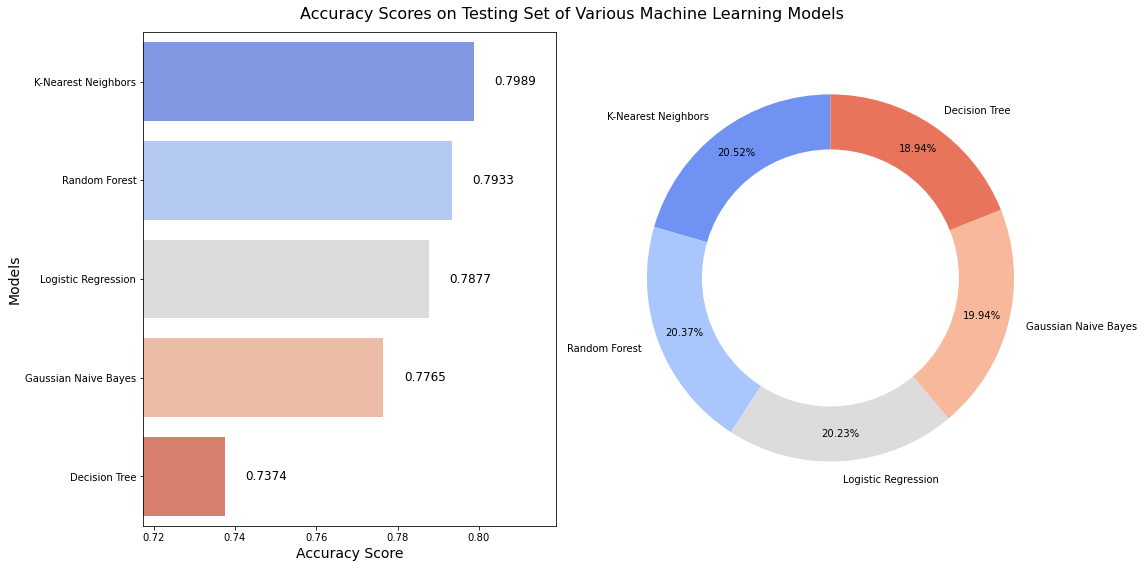

In [848]:
# Sort the testing_accuracies dictionary by accuracy values (highest to lowest)
sorted_accuracies = dict(sorted(testing_accuracies.items(), key=lambda item: item[1], reverse=True))

# Visualization of the accuracy scores
labels = list(sorted_accuracies.keys())
data = list(sorted_accuracies.values())

# Create subplots for both pie chart and bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Accuracy Scores on Testing Set of Various Machine Learning Models", size=16)

# Pie chart showing accuracy distribution
colors = sns.color_palette('coolwarm', len(data))
ax2.pie(data, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, pctdistance=0.85)
ax2.axis('equal') 
centre_circle = plt.Circle((0, 0), 0.70, fc='white') 
ax2.add_artist(centre_circle)

# Bar plot for accuracy comparison
sns.barplot(x=data, y=labels, ax=ax1, palette='coolwarm')

# Adjust the x-axis range for better clarity of differences
ax1.set_xlim([min(data) - 0.02, max(data) + 0.02])  

# Set x and y axis labels and the title
ax1.set_xlabel('Accuracy Score', fontsize=14)
ax1.set_ylabel('Models', fontsize=14)

# Annotate the bars with the accuracy values
for i in range(len(data)):
    ax1.text(data[i] + 0.005, i, f'{data[i]:.4f}', va='center', fontsize=12)

plt.tight_layout() 
plt.show()

**Observation**

The K-Nearest Neighbors model performed consistently well across both training and testing phases, with the highest testing accuracy at 0.7989. While the Decision Tree and Random Forest models showed excellent training accuracy, their testing accuracies were lower, indicating potential overfitting.

**Confusion Matrix**

- True Positives: When the model accurately predicts that the passengers survived.
- True Negatives: When the model accurately predicts that the passengers did not survive.
- False Positives: When the passenger did not survive but the model predicted they survived.
- False Negatives: When the passenger survived but the model predicted they did not survive.

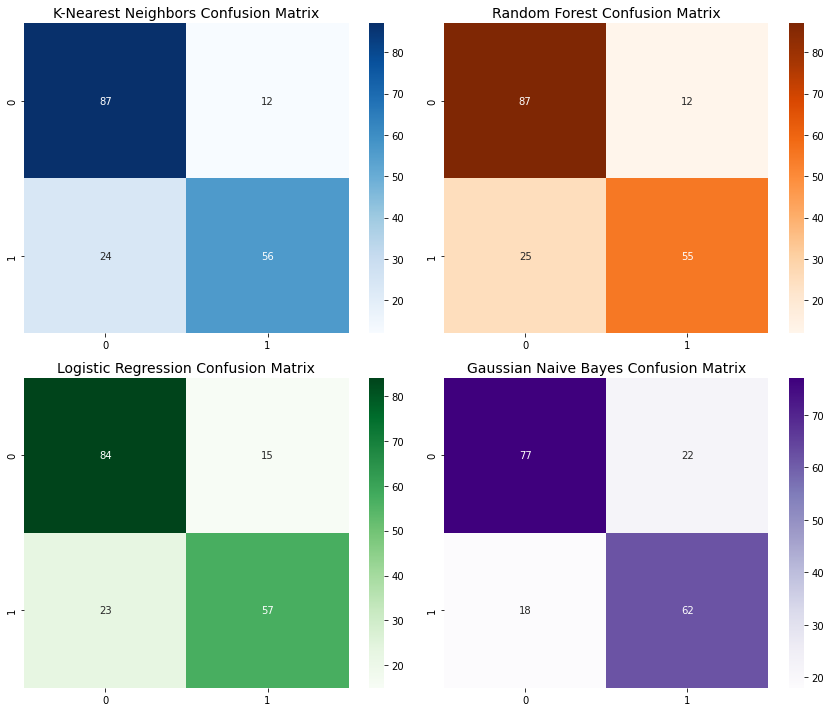

In [849]:
# Visualization of confusion matrices for the top 4 models
n_rows = 2
n_cols = 2

# The subplot grid and figure size of each graph
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))

# Top 4 models (sorted by accuracy)
top_models = list(sorted_accuracies.keys())[:4]

# Distinct color maps for each model's confusion matrix
color_maps = ['Blues', 'Oranges', 'Greens', 'Purples']

for i, model_name in enumerate(top_models):
    ax = axs[i // 2, i % 2]  # Get the appropriate subplot
    model = models[model_name]
    
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='', cmap=color_maps[i], ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix", size=14)

plt.tight_layout()
plt.show()

---
### Conclusion

The K-Nearest Neighbors (KNN) model outperforms all other models in accuracy, achieving the highest number of correct predictions (143) and the lowest error rate (36), making it the most reliable model for predicting Titanic survival.